In [1]:
# Read in the document-term matrix
import pandas as pd

df = pd.read_pickle('objects/df.pkl')

df.head()

,date,title,text,url,stars,cleaned
0,2015-10-10 14:32:51+00:00,Bad customer service. Staff are very impolite ...,Used national rail twice and on both occasions...,nationalrail,star-rating-1,used national rail twice and both occasions fo...
1,2015-09-22 17:04:56+00:00,Pretty awful service,I phoned National rail to find out why several...,nationalrail,star-rating-1,phoned national rail find out why several trai...
2,2015-03-13 23:37:05+00:00,Awful staff,I travel from Brokenhast to southampton centra...,nationalrail,star-rating-1,travel from brokenhast southampton central wit...
3,2015-01-13 12:26:52+00:00,Very good,Saved about £50 on a single trip using Nationa...,nationalrail,star-rating-4,saved about single trip using nationalrail pic...
4,2011-05-28 15:00:36+00:00,Check it out.,I always use the national rail enquiry site wh...,nationalrail,star-rating-4,always use the national rail enquiry site when...


Continue with on lemmatizing words and also with keeping words only with Part of Speech as Noun or Adj.

In [2]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['lemmatized']=df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)  and  (token.pos_ in ['NOUN', 'ADJ'] )  ]))



In [3]:
df['lemmatized']

0       national rail occasion staff unpleasant incomp...
1       national rail train adviser english website lo...
2       travel central ticket train time staff apologi...
3       single trip nationalrail specific train cheap ...
4       national rail enquiry site rail journey site q...
                              ...                        
2016    signal failure rain sunny regular occurrence s...
2017    train sure timetable expectation regularity se...
2018    yearly basis group preschool child train ride ...
2019    day newish train clean delay cancellation carr...
2020                                             positive
Name: lemmatized, Length: 1441, dtype: object

Proceeding on Topic extraction found that many words such as train is found a lot. remove some of them

In [4]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer='word')
data = cv.fit_transform(df['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns= cv.get_feature_names())
df_dtm.index=df.index
df_dtm.head()

c:\program files\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aberdare,abhorrent,ability,abject,able,abmsmal,abrasive,abrupt,absence,absolute,...,yearly,yeld,yellow,yesterday,yorkshire,you,young,youngster,yuck,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# save the dataframe
df.to_pickle('objects/df_lemmatized.pkl')


# save the Document Term Matrix
df_dtm.to_pickle('objects/dtm_lemmatized.pkl')


import pickle
pickle.dump(cv, open("objects/CountVector_on_lemmatized.pkl", "wb"))

### Grouping the reviews by train company (lemmatized and POSTags)

In [6]:
df_grouped=df[['url','lemmatized']].groupby(by='url').agg(lambda x:' '.join(x))
df_grouped['url'] = df_grouped.index
#df_grouped['url'] = df_grouped['url'].apply(lambda x: x.replace('www.','').split('.')[0])

df_grouped.head()

,lemmatized,url
url,,
arrivatrainswales,terrible service poor service chester manchest...,arrivatrainswales
buytickets.crosscountrytrains,train explanation logic number carriage servic...,buytickets.crosscountrytrains
chilternrailways,poor service time bad experience ticket proof ...,chilternrailways
eastmidlandstrains,rail card train minute coach train middle trai...,eastmidlandstrains
eurostar,poor experience bad bad chat phone help simila...,eurostar


In [7]:
cv = CountVectorizer(analyzer='word')
data = cv.fit_transform(df_grouped['lemmatized'])
df_dtm_grouped = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm_grouped.index=df_grouped.index
df_dtm_grouped.head()

c:\program files\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aberdare,abhorrent,ability,abject,able,abmsmal,abrasive,abrupt,absence,absolute,...,yearly,yeld,yellow,yesterday,yorkshire,you,young,youngster,yuck,zone
url,,,,,,,,,,,,,,,,,,,,,
arrivatrainswales,1,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
buytickets.crosscountrytrains,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,2,0,0,0,0,0
chilternrailways,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
eastmidlandstrains,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
eurostar,0,0,1,0,5,0,1,1,0,4,...,0,0,0,2,0,3,1,1,0,0


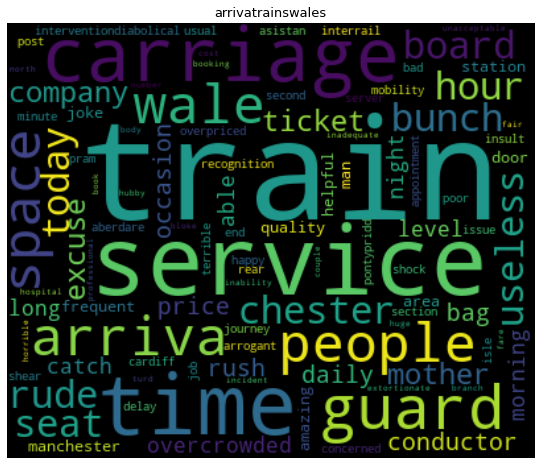

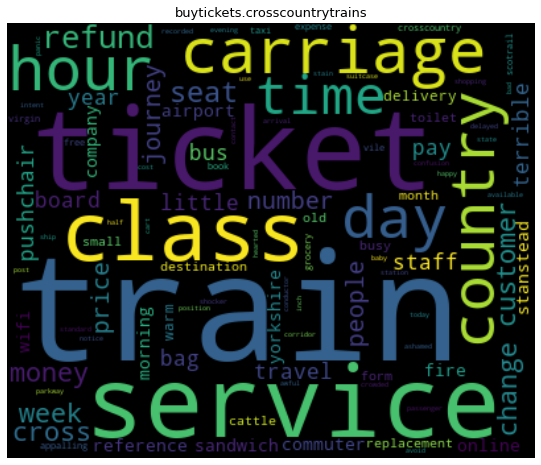

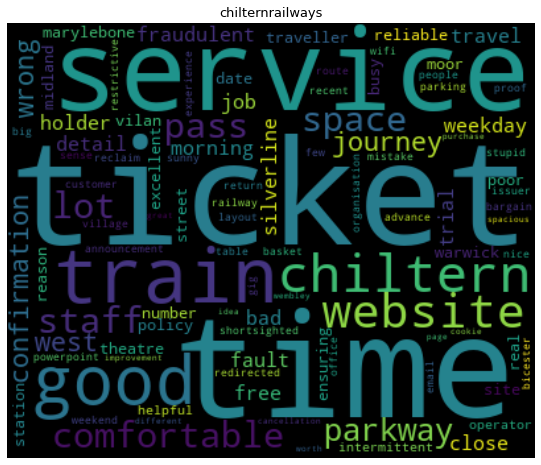

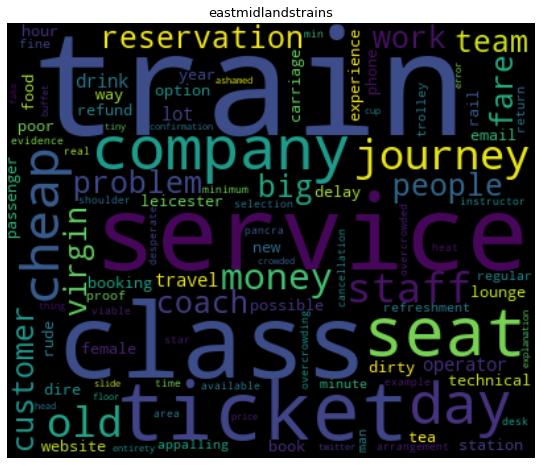

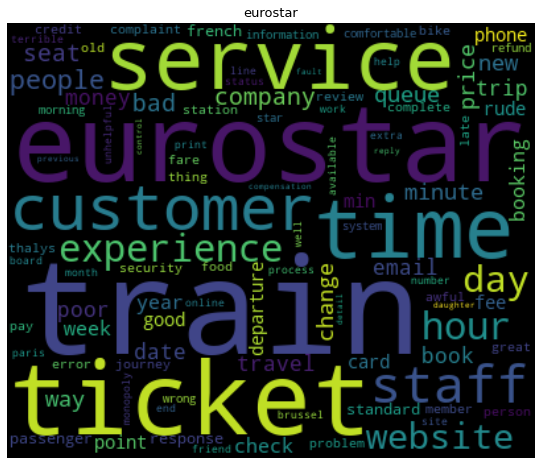

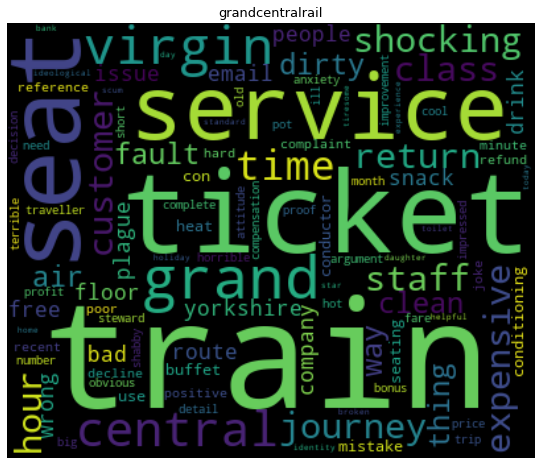

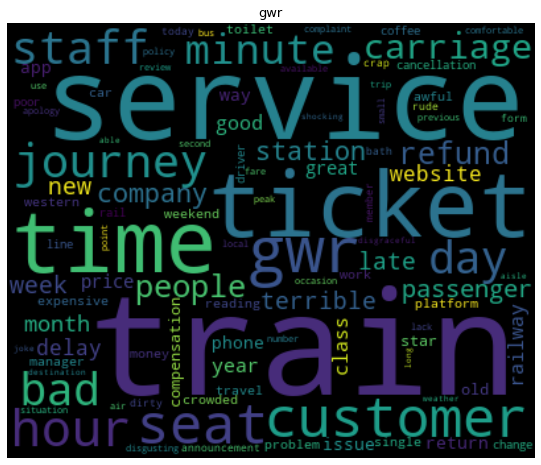

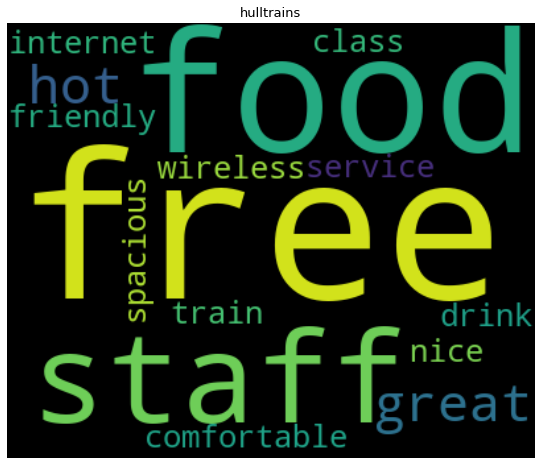

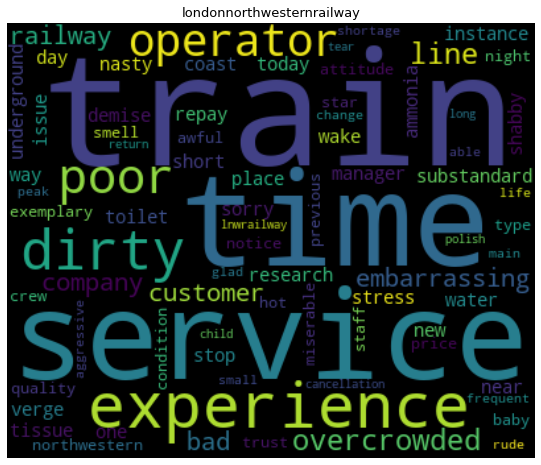

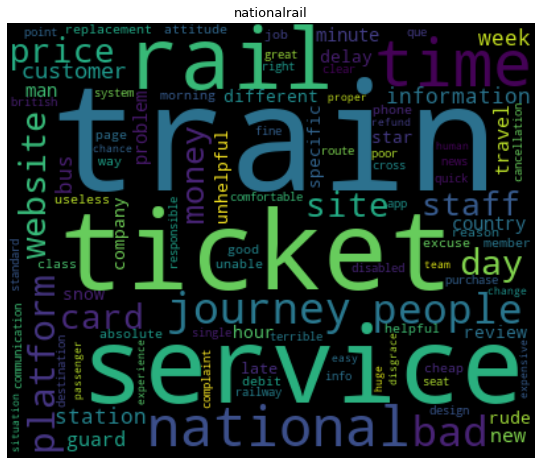

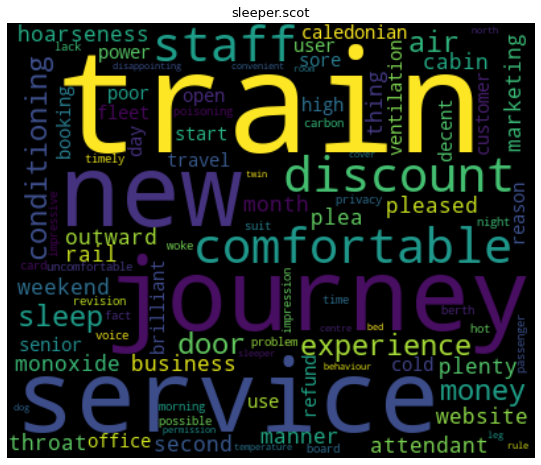

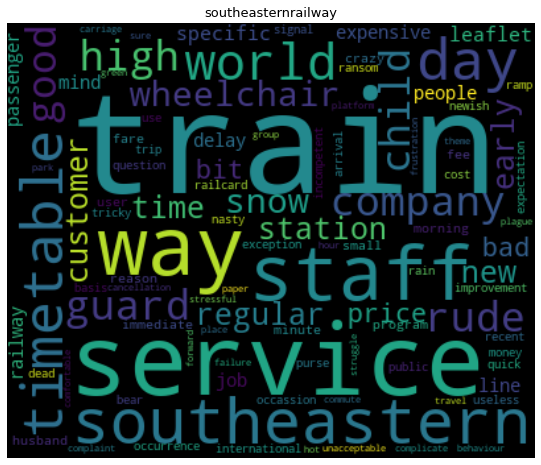

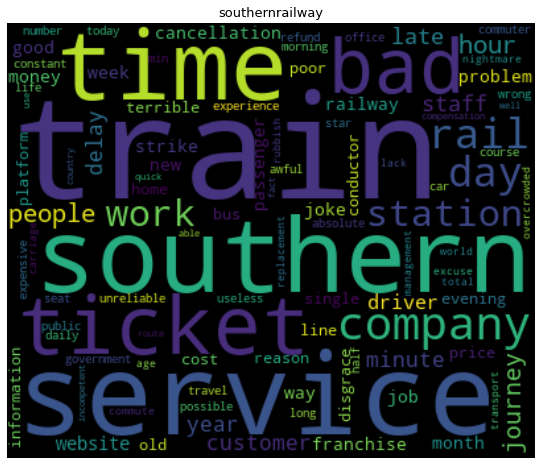

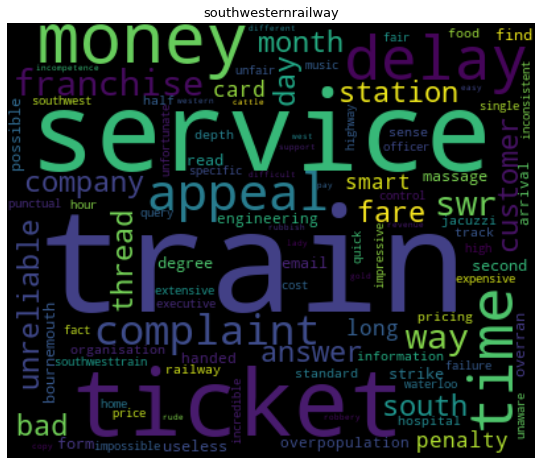

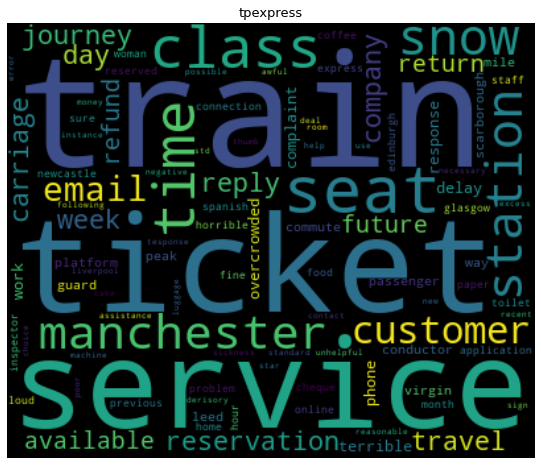

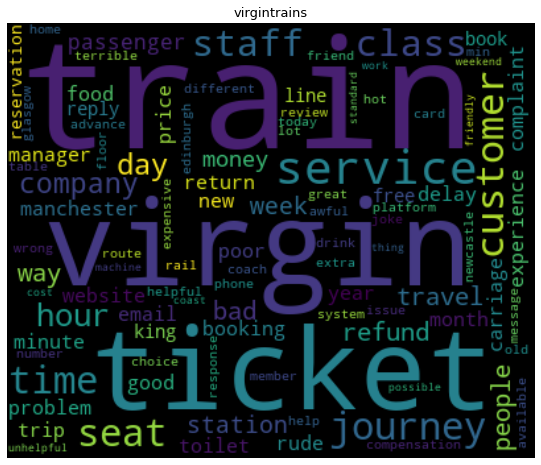

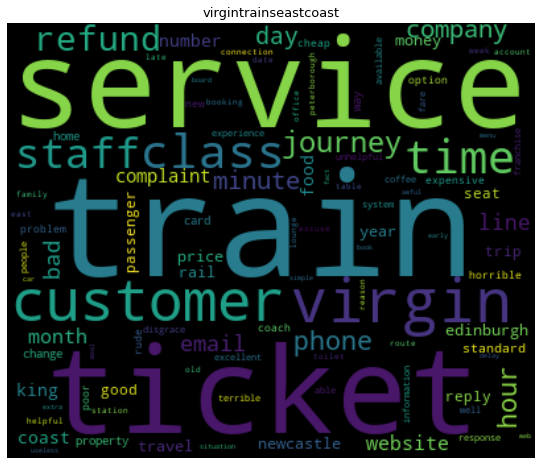

In [8]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap
import matplotlib.pyplot as plt

# Function for generating word clouds
def generate_wordcloud(data,title):
    wc = WordCloud(width=400, height=330, max_words=100).generate_from_frequencies(data)
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title('\n'.join(wrap(title,60)),fontsize=13)
    plt.show()

df_dtm_grouped=df_dtm_grouped.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm_grouped.columns):
    
    generate_wordcloud(df_dtm_grouped[product].sort_values(ascending=False),product)

In [9]:
# save the Document Term Matrix of lemma and postags for grouped
df_dtm_grouped.to_pickle('objects/dtm_grouped.pkl')



# Sentiment Analysis for the Train companies


In [10]:
from textblob import TextBlob



df_grouped['polarity'] = df_grouped['lemmatized'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_grouped['subjectivity'] = df_grouped['lemmatized'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df_grouped

,lemmatized,url,polarity,subjectivity
url,,,,
arrivatrainswales,terrible service poor service chester manchest...,arrivatrainswales,-0.053914,0.524821
buytickets.crosscountrytrains,train explanation logic number carriage servic...,buytickets.crosscountrytrains,-0.143871,0.533986
chilternrailways,poor service time bad experience ticket proof ...,chilternrailways,0.155000,0.598667
eastmidlandstrains,rail card train minute coach train middle trai...,eastmidlandstrains,-0.001814,0.516422
eurostar,poor experience bad bad chat phone help simila...,eurostar,-0.078603,0.533610
grandcentralrail,route virgin train shocking decline standard s...,grandcentralrail,-0.091496,0.655303
gwr,journey station staff unhelpful rude taxi trai...,gwr,-0.124016,0.557413
hulltrains,great service comfortable train class spacious...,hulltrains,0.460714,0.785714
londonnorthwesternrailway,miserable experience life stress time able tim...,londonnorthwesternrailway,-0.277879,0.614515


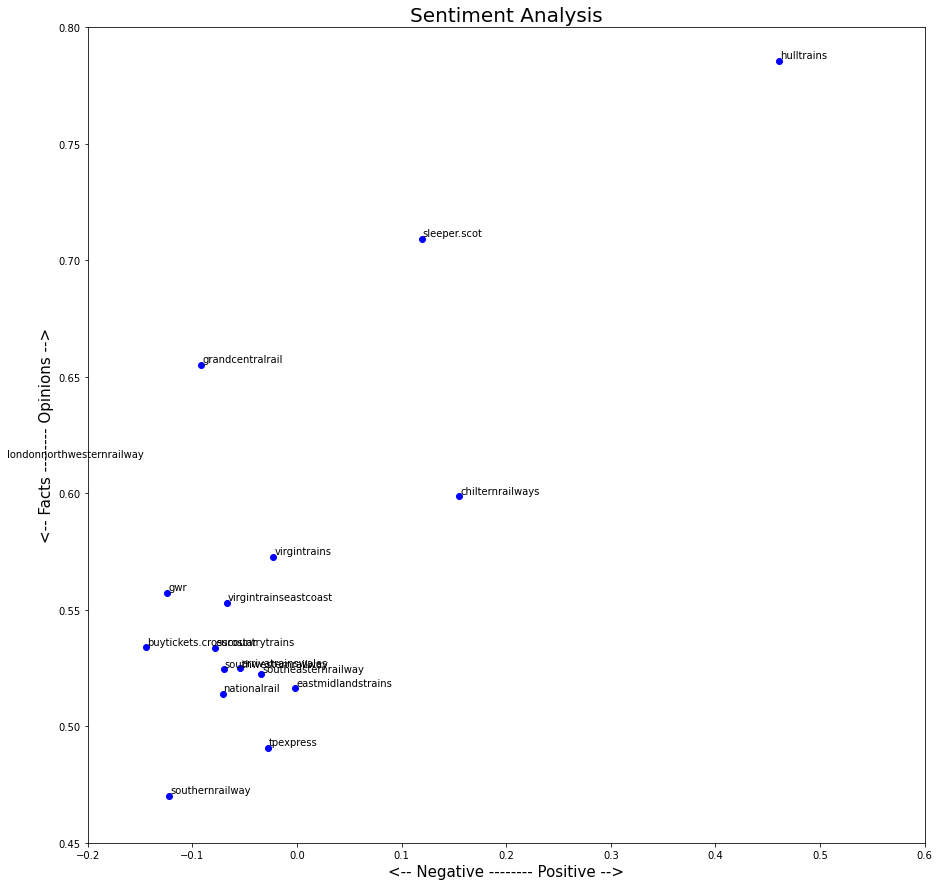

In [11]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 15]

for index, train in enumerate(df_grouped.index):
    x = df_grouped.polarity.loc[train]
    y = df_grouped.subjectivity.loc[train]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, df_grouped['url'][index], fontsize=10)
    plt.xlim(-0.2,0.6) 
    plt.ylim(0.45, 0.8) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [12]:
df2= df.groupby(['url']).size().reset_index(name='count').sort_values(by = 'count')

In [13]:
df2 = df2.set_index(['url'])

In [14]:
df_grouped

,lemmatized,url,polarity,subjectivity
url,,,,
arrivatrainswales,terrible service poor service chester manchest...,arrivatrainswales,-0.053914,0.524821
buytickets.crosscountrytrains,train explanation logic number carriage servic...,buytickets.crosscountrytrains,-0.143871,0.533986
chilternrailways,poor service time bad experience ticket proof ...,chilternrailways,0.155000,0.598667
eastmidlandstrains,rail card train minute coach train middle trai...,eastmidlandstrains,-0.001814,0.516422
eurostar,poor experience bad bad chat phone help simila...,eurostar,-0.078603,0.533610
grandcentralrail,route virgin train shocking decline standard s...,grandcentralrail,-0.091496,0.655303
gwr,journey station staff unhelpful rude taxi trai...,gwr,-0.124016,0.557413
hulltrains,great service comfortable train class spacious...,hulltrains,0.460714,0.785714
londonnorthwesternrailway,miserable experience life stress time able tim...,londonnorthwesternrailway,-0.277879,0.614515


In [15]:
df2

,count
url,
hulltrains,2
sleeper.scot,6
londonnorthwesternrailway,8
chilternrailways,8
southwesternrailway,13
grandcentralrail,19
tpexpress,20
southeasternrailway,20
arrivatrainswales,20


In [16]:
df3 = df_grouped.join(df2)

### 

In [17]:
df3 = df3[df3['count']>19]

In [18]:
df3

,lemmatized,url,polarity,subjectivity,count
url,,,,,
arrivatrainswales,terrible service poor service chester manchest...,arrivatrainswales,-0.053914,0.524821,20
buytickets.crosscountrytrains,train explanation logic number carriage servic...,buytickets.crosscountrytrains,-0.143871,0.533986,20
eastmidlandstrains,rail card train minute coach train middle trai...,eastmidlandstrains,-0.001814,0.516422,20
eurostar,poor experience bad bad chat phone help simila...,eurostar,-0.078603,0.533610,180
gwr,journey station staff unhelpful rude taxi trai...,gwr,-0.124016,0.557413,180
nationalrail,national rail occasion staff unpleasant incomp...,nationalrail,-0.071087,0.513900,65
southeasternrailway,poor service high price use train commute work...,southeasternrailway,-0.034197,0.522367,20
southernrailway,timetable ticket time train charge fortunate i...,southernrailway,-0.122066,0.470208,260
tpexpress,service important train sure early train neces...,tpexpress,-0.027620,0.490786,20


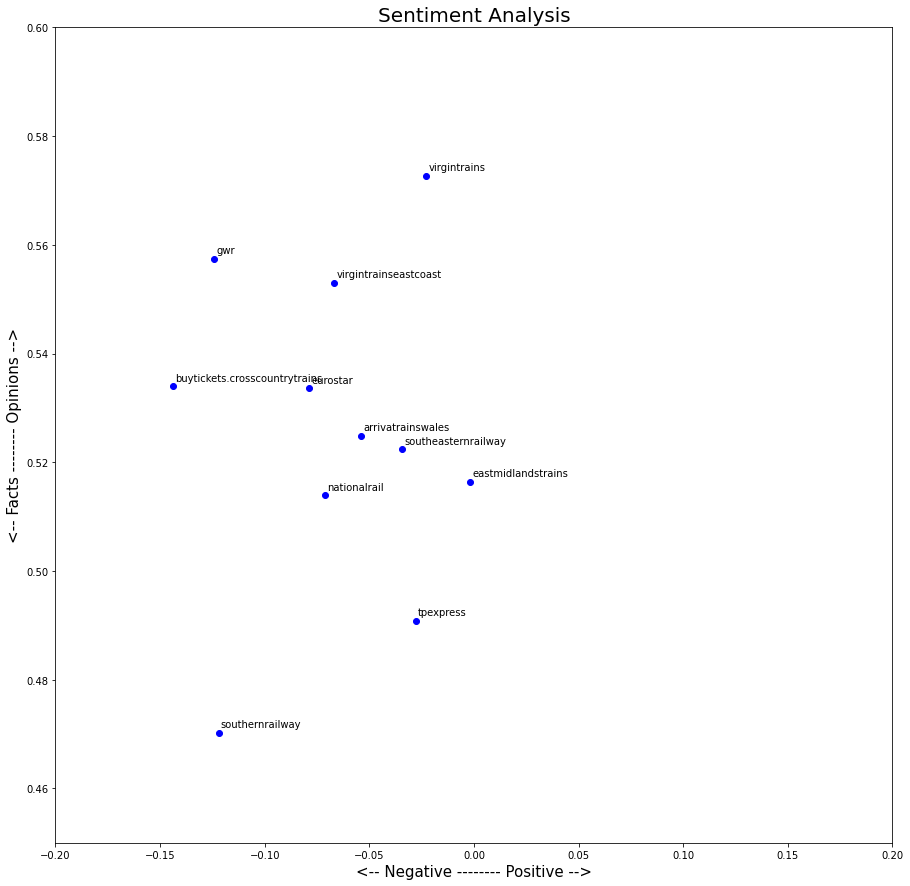

In [19]:
for index, train in enumerate(df3.index):
    x = df3.polarity.loc[train]
    y = df3.subjectivity.loc[train]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, df3['url'][index], fontsize=10)
    plt.xlim(-0.2,0.2) 
    plt.ylim(0.45, 0.6) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()